In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | banda aceh
Processing Record 3 of Set 1 | dalvik
Processing Record 4 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 1 | general roca
Processing Record 6 of Set 1 | wanaka
Processing Record 7 of Set 1 | flinders
Processing Record 8 of Set 1 | paamiut
Processing Record 9 of Set 1 | plettenberg bay
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | bijie
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | inderborskiy
City not found. Skipping...
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | burica
City not found. Skipping...
Processing Record 20 of Set 1 | puerto escondido
Processing Record 21 of Set 1 | to

Processing Record 37 of Set 4 | jadu
Processing Record 38 of Set 4 | lompoc
Processing Record 39 of Set 4 | lephepe
City not found. Skipping...
Processing Record 40 of Set 4 | macklin
Processing Record 41 of Set 4 | brae
Processing Record 42 of Set 4 | kahului
Processing Record 43 of Set 4 | cravo norte
Processing Record 44 of Set 4 | hithadhoo
Processing Record 45 of Set 4 | necochea
Processing Record 46 of Set 4 | kanaya
Processing Record 47 of Set 4 | puyang
Processing Record 48 of Set 4 | vaini
Processing Record 49 of Set 4 | qianguo
Processing Record 50 of Set 4 | banyo
Processing Record 1 of Set 5 | jalu
Processing Record 2 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 5 | dhidhdhoo
Processing Record 4 of Set 5 | nanakuli
Processing Record 5 of Set 5 | mahebourg
Processing Record 6 of Set 5 | launceston
Processing Record 7 of Set 5 | bairiki
Processing Record 8 of Set 5 | wahiawa
Processing Record 9 of Set 5 | olafsvik
Processing Record 10 of Set 5

Processing Record 30 of Set 8 | inirida
Processing Record 31 of Set 8 | vardo
Processing Record 32 of Set 8 | svobodnyy
Processing Record 33 of Set 8 | dryden
Processing Record 34 of Set 8 | san rafael
Processing Record 35 of Set 8 | sucua
Processing Record 36 of Set 8 | qarqin
Processing Record 37 of Set 8 | chiautla
Processing Record 38 of Set 8 | marovoay
Processing Record 39 of Set 8 | alta floresta
Processing Record 40 of Set 8 | helena
Processing Record 41 of Set 8 | tarakan
Processing Record 42 of Set 8 | tukums
Processing Record 43 of Set 8 | huangnihe
Processing Record 44 of Set 8 | maldonado
Processing Record 45 of Set 8 | sambava
Processing Record 46 of Set 8 | half moon bay
Processing Record 47 of Set 8 | ewa beach
Processing Record 48 of Set 8 | bambanglipuro
Processing Record 49 of Set 8 | aykino
Processing Record 50 of Set 8 | independence
Processing Record 1 of Set 9 | kiunga
Processing Record 2 of Set 9 | marienburg
Processing Record 3 of Set 9 | uglegorsk
Processing R

Processing Record 23 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 24 of Set 12 | eureka
Processing Record 25 of Set 12 | varkkallai
Processing Record 26 of Set 12 | westport
Processing Record 27 of Set 12 | negele
City not found. Skipping...
Processing Record 28 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 29 of Set 12 | marsh harbour
Processing Record 30 of Set 12 | maimon
City not found. Skipping...
Processing Record 31 of Set 12 | baoqing
Processing Record 32 of Set 12 | susanino
Processing Record 33 of Set 12 | kikwit
Processing Record 34 of Set 12 | barzas
Processing Record 35 of Set 12 | uarini
Processing Record 36 of Set 12 | kharp
Processing Record 37 of Set 12 | san cristobal
Processing Record 38 of Set 12 | la ceiba
Processing Record 39 of Set 12 | harper
Processing Record 40 of Set 12 | samarai
Processing Record 41 of Set 12 | plouzane
Processing Record 42 of Set 12 | karad
Processing Record 43 of Set 12 | guatire
Processing R

In [11]:
len(city_data)

568

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,55.02,46,40,21.85,AR,2022-11-08 20:04:11
1,Banda Aceh,5.5577,95.3222,78.73,81,100,4.27,ID,2022-11-08 20:08:35
2,Dalvik,65.9702,-18.5286,39.20,97,100,9.91,IS,2022-11-08 20:08:35
3,General Roca,-39.0333,-67.5833,89.62,15,100,4.29,AR,2022-11-08 20:08:35
4,Wanaka,-44.7000,169.1500,59.11,57,80,3.00,NZ,2022-11-08 20:08:36
5,Flinders,-34.5833,150.8552,60.19,84,4,8.01,AU,2022-11-08 20:08:36
6,Paamiut,61.9940,-49.6678,14.45,58,21,8.30,GL,2022-11-08 20:08:36
7,Plettenberg Bay,-34.0527,23.3716,59.90,80,98,4.50,ZA,2022-11-08 20:08:37
8,Punta Arenas,-53.1500,-70.9167,55.51,47,40,21.85,CL,2022-11-08 20:08:37
9,Bijie,27.3125,105.2942,52.21,95,54,3.83,CN,2022-11-08 20:08:37


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-11-08 20:04:11,-54.8000,-68.3000,55.02,46,40,21.85
1,Banda Aceh,ID,2022-11-08 20:08:35,5.5577,95.3222,78.73,81,100,4.27
2,Dalvik,IS,2022-11-08 20:08:35,65.9702,-18.5286,39.20,97,100,9.91
3,General Roca,AR,2022-11-08 20:08:35,-39.0333,-67.5833,89.62,15,100,4.29
4,Wanaka,NZ,2022-11-08 20:08:36,-44.7000,169.1500,59.11,57,80,3.00
5,Flinders,AU,2022-11-08 20:08:36,-34.5833,150.8552,60.19,84,4,8.01
6,Paamiut,GL,2022-11-08 20:08:36,61.9940,-49.6678,14.45,58,21,8.30
7,Plettenberg Bay,ZA,2022-11-08 20:08:37,-34.0527,23.3716,59.90,80,98,4.50
8,Punta Arenas,CL,2022-11-08 20:08:37,-53.1500,-70.9167,55.51,47,40,21.85
9,Bijie,CN,2022-11-08 20:08:37,27.3125,105.2942,52.21,95,54,3.83


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

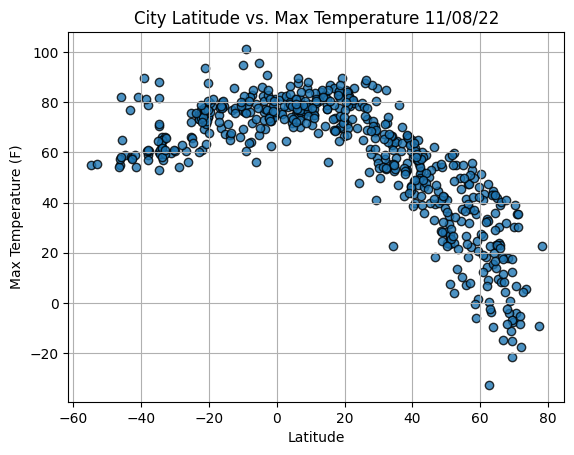

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

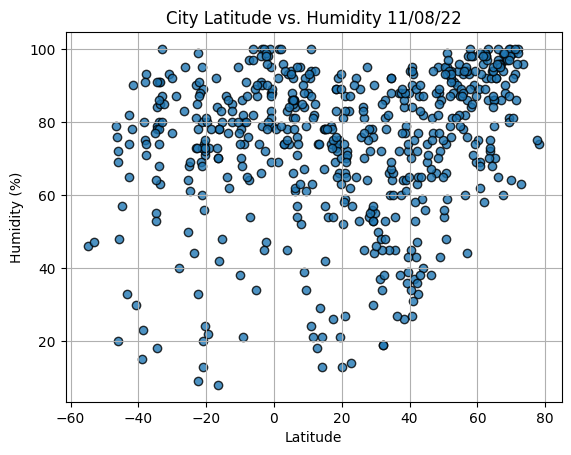

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

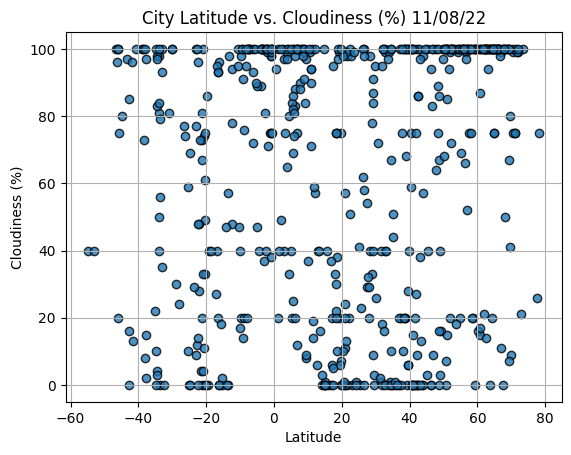

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

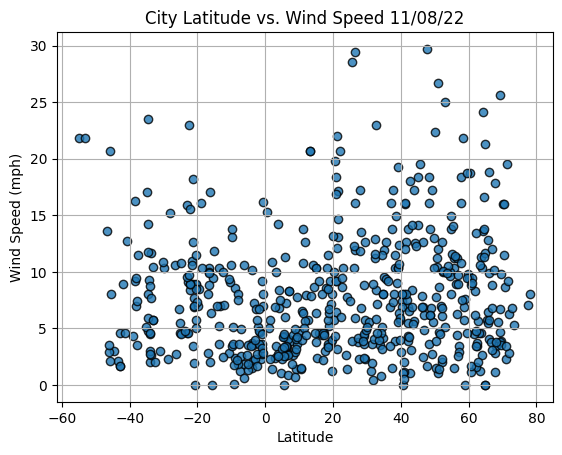

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()